In [1]:
# %cd ..
import numpy as np, matplotlib.pyplot as plt
import inputs, simuls, analysis
results = analysis.GetResults(verbose=True)

# PenEasy SPC simulation

In [ ]:
pid = 'SPC'
# Initialize PenEasy Input Editor
peneasy_inps = inputs.PenEasy(verbose=True)

# Initialize Simulators (identified by pid)
peneasy_sims = simuls.PenEasy(verbose=True)
peneasy_sims.activate_pid('SPC')

In [ ]:
SIZE = [20, 20, 20]
STEP = [0.3, 0.3, 0.3]  #cm
nhist = "1e6"

peneasy_inps.edit_seed(pid, 12345, 54321)
peneasy_inps.edit_source_nhist(pid, nhist)
peneasy_inps.edit_voxSize(pid, SIZE, STEP)

In [ ]:
isotopes = ["C11", "F18", "Ga68"] 
MATS = [
    #material   mat_name   mat_id  density (g/cm3)
    {'lung' : ['lungICRP', 1,     0.30+00]},
    {'bone' : ['boneB100', 1,     1.45+00]}
        ]

peneasy_inps.verbose = False
for MAT in MATS:
    material = list(MAT.keys())[0]
    print(f"****SIMULATING {material}****")
    peneasy_inps.edit_mat(pid, MAT, SIZE, STEP)
    res_folder = f"RESULTS/SPC/{material.capitalize()}/PenEasy_xyz"
    
    for iso in isotopes:
        print(f"Simulating {iso}")
        peneasy_inps.edit_isotope(pid, iso)
        peneasy_sims.simulate(pid, get_times=True, time_samples=1, output_dir=res_folder, final_file=f"{iso}")

In [ ]:
import numpy as np

for MAT in MATS:
    material = list(MAT.keys())[0]
    # if material == 'lung':
    #     continue
    res_folder = f"RESULTS/SPC/{material.capitalize()}/PenEasy_xyz"
    times_file = res_folder + "/" + pid + "_times.txt"
    times = np.loadtxt(times_file).astype("str")
    times[:,1], times[:,0] = times[:,0], isotopes
    np.savetxt(times_file, times, fmt='%s')

# PeneloPET simulation

In [2]:
pid = '2024'
# Initialize PeneloPET Input Editor
penelopet_inps = inputs.PeneloPET(verbose=True)

# Initialize Simulators (identified by pid)
penelopet_sims = simuls.PeneloPET(verbose=True)
penelopet_sims.activate_pid('2024')

PeneloPET 2024 activated


In [4]:
MATS = [
    #material   mat_name   mat_id  density (g/cm3)
    {'Lung' : ['lung', 1,     0.30+00]},
    {'Bone' : ['bone_B100', 1,     1.45+00]}
        ]
nhist = "1.1e6"

pid = '2024'
penelopet_inps.edit_seed(pid, 12345, 54321)

"penelopet/work/main/main.inp" random seeds modified to 12345 and 54321


In [5]:
isotopes = ["C11", "F18", "Ga68"] 


penelopet_inps.verbose = False
for MAT in MATS:
    material = list(MAT.keys())[0]
    print(f"****SIMULATING {material}****")
    penelopet_inps.edit_mat(pid, MAT)
    res_folder = f"RESULTS/SPC/{material}/PeneloPET2024_xyz"
    for iso in isotopes:
        print(f"Simulating {iso}")
        penelopet_inps.edit_isotope(pid, iso)
        if iso == "I124":
            penelopet_inps.edit_source_activity(pid, str(float(nhist)*5))
        else:
            penelopet_inps.edit_source_activity(pid, nhist)
        penelopet_sims.simulate(pid, get_times=True, time_samples=1, output_dir=res_folder, final_file=f"{iso}")

****SIMULATING Lung****
Simulating C11


In [ ]:
material = 'Lung'
res_folder = f"RESULTS/SPC/{material}/PeneloPET2024_xyz"
times_file = res_folder + "/" + pid + "_times.txt"
times = np.loadtxt(times_file).astype("str")
times[:,1], times[:,0] = times[:,0], isotopes
np.savetxt(times_file, times, fmt='%s')

# vGATE 9.x simulation

In [ ]:
pid = '9'
# Initialize GATE Input Editor
gate_inps = inputs.GATE(verbose=True)

# Initialize Simulators (identified by pid)
gate_sims = simuls.GATE(verbose=True)
gate_sims.activate_pid(pid, output_format='dat')

In [ ]:
nhist = "1e6"

gate_inps.edit_seed(pid, 12345, 54321)
gate_inps.edit_source_nhist(pid, nhist)

In [ ]:
isotopes = ["C11", "F18", "Ga68"] 
MATS = {
    # SIZE     STEP (cm)   material   mat_name   mat_id  density (g/cm3)
    ((20,)*3, (0.3,)*3 ) : {'lung' : ['LungICRP', 2,     0.30+00]},
    ((20,)*3, (0.07,)*3) : {'bone' : ['BoneB100', 12,    1.45+00]}
        }

gate_inps.verbose = False
for STEPnSIZE, MAT in MATS.items():
    material = list(MAT.keys())[0]
    # if material == 'lung':
    #     continue
    print(f"****SIMULATING {material}****")

    SIZE, STEP = STEPnSIZE
    gate_inps.edit_voxSize(pid, SIZE, STEP)
    gate_inps.edit_mat(pid, MAT, SIZE, STEP)

    res_folder = f"RESULTS/SPC/{material.capitalize()}/GATE93_xyz"
    for iso in isotopes:
        print(f"--Simulating {iso}")
        gate_inps.edit_isotope(pid, iso)
        gate_sims.simulate(pid, get_times=True, time_samples=1, output_dir=res_folder, final_file=f"{iso}")


In [ ]:
import numpy as np

for STEPnSIZE, MAT in MATS.items():
    material = list(MAT.keys())[0]
    if material == 'lung':
        continue
    res_folder = f"RESULTS/SPC/{material.capitalize()}/GATE93_xyz"
    times_file = res_folder + "/" + pid + "_times.txt"
    times = np.loadtxt(times_file).astype("str")
    times[:,1], times[:,0] = times[:,0], isotopes
    np.savetxt(times_file, times, fmt='%s')

# Results analysis

In [ ]:
program_folder = "PHITS_xyz"
mat = "Lung"
folder = f"RESULTS/SPC/{mat}/{program_folder}"
trim = int(1e6)

if mat == "Bone":
    rthresh = {"C11" : 4, "F18" : 2, "Ga68" : 8}
elif mat== "Lung":
    rthresh = {"C11" : 15, "F18" : 8, "Ga68" : 30}

for iso in rthresh.keys():
    if program_folder == "GATE7_xyz" and iso not in ["C11", "O15", "F18"]:
        continue
    print(f"Filtering {iso}")
    threshold = rthresh[iso] #mm
    analysis.filter_rmax(f"{folder}/{iso}.dat.original", f"{folder}/{iso}.dat", threshold=threshold, trim=trim, fmt='%.6f')

In [5]:
histo_bins = 201
histo_step = .01 #cm
isotopes = ["C11", "F18", "Ga68"] 
mats = ["Lung", "Water", "Bone"]
pfolders = {
    "PHITS 3.3":"PHITS_xyz", 
    "PenEasy 2020":"PenEasy_xyz",
    "PeneloPET 2024":"PeneloPET2024_xyz", 
    "GATE 9.2":"GATE92_xyz", 
    "GATE 9.3":"GATE93_xyz",
}

labels_iso = {mat:{iso:[] for iso in isotopes} for mat in mats}
labels_prg = {mat:{p:[] for p in pfolders.keys()} for mat in mats}

results.active_results.clear()
for mat in mats:
    for iso in isotopes:
        for pname, pfolder in pfolders.items():
            if pfolder == "GATE7_xyz" and iso not in ["C11", "F18"]: continue
            # file with results
            rf = f"RESULTS/SPC/{mat}/{pfolder}/{iso}.dat"
            # result label
            rl = f"{pname} {iso} {mat}"
            
            # load results
            results.load(rl, rf, [histo_bins]*3, [histo_step]*3)

            # store labels
            labels_iso[mat][iso].append(rl)
            labels_prg[mat][pname].append(rl)

PHITS 3.3 C11 Lung loaded
PenEasy 2020 C11 Lung loaded
PeneloPET 2024 C11 Lung loaded
GATE 9.2 C11 Lung loaded
GATE 9.3 C11 Lung loaded
PHITS 3.3 F18 Lung loaded
PenEasy 2020 F18 Lung loaded
PeneloPET 2024 F18 Lung loaded
GATE 9.2 F18 Lung loaded
GATE 9.3 F18 Lung loaded
PHITS 3.3 Ga68 Lung loaded
PenEasy 2020 Ga68 Lung loaded
PeneloPET 2024 Ga68 Lung loaded
GATE 9.2 Ga68 Lung loaded
GATE 9.3 Ga68 Lung loaded
PHITS 3.3 C11 Water loaded
PenEasy 2020 C11 Water loaded
PeneloPET 2024 C11 Water loaded
GATE 9.2 C11 Water loaded
GATE 9.3 C11 Water loaded
PHITS 3.3 F18 Water loaded
PenEasy 2020 F18 Water loaded
PeneloPET 2024 F18 Water loaded
GATE 9.2 F18 Water loaded
GATE 9.3 F18 Water loaded
PHITS 3.3 Ga68 Water loaded
PenEasy 2020 Ga68 Water loaded
PeneloPET 2024 Ga68 Water loaded
GATE 9.2 Ga68 Water loaded
GATE 9.3 Ga68 Water loaded
PHITS 3.3 C11 Bone loaded
PenEasy 2020 C11 Bone loaded
PeneloPET 2024 C11 Bone loaded
GATE 9.2 C11 Bone loaded
GATE 9.3 C11 Bone loaded
PHITS 3.3 F18 Bone load

In [6]:
results.data_analysis()

Size of annihilations sample:
     PHITS 3.3 C11 Lung                      	    988257
     PenEasy 2020 C11 Lung                   	    999853
     PeneloPET 2024 C11 Lung                 	      1130
     GATE 9.2 C11 Lung                       	   1000000
     GATE 9.3 C11 Lung                       	   1000000
     PHITS 3.3 F18 Lung                      	   1000000
     PenEasy 2020 F18 Lung                   	    999522
     PeneloPET 2024 F18 Lung                 	      1069
     GATE 9.2 F18 Lung                       	   1000000
     GATE 9.3 F18 Lung                       	   1000000
     PHITS 3.3 Ga68 Lung                     	   1000000
     PenEasy 2020 Ga68 Lung                  	   1000000
     PeneloPET 2024 Ga68 Lung                	      1018
     GATE 9.2 Ga68 Lung                      	   1000000
     GATE 9.3 Ga68 Lung                      	   1000000
     PHITS 3.3 C11 Water                     	    988366
     PenEasy 2020 C11 Water                  	   1000000
 

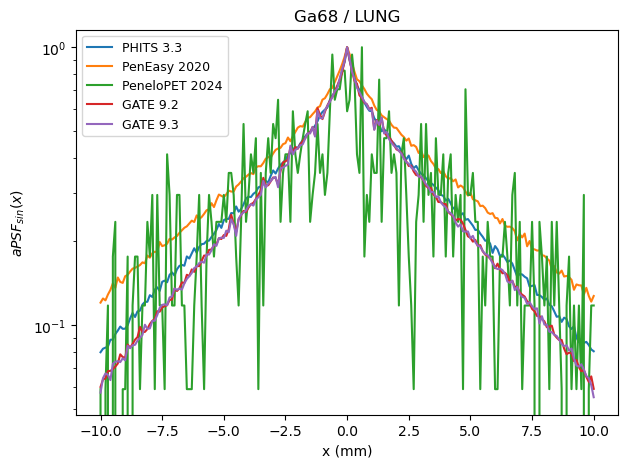

In [14]:
mat = "Lung"
iso = "Ga68"
l = labels_iso[mat][iso]
sl = list(labels_prg[mat].keys())
if iso not in ["C11", "F18"] and "GATE 7.0" in sl:
    sl.remove("GATE 7.0")
sl = dict(zip(l, sl))
plt.figure(figsize=(7,5))
results.plot_aPSFx(sin=True, log_scale=True, labels=l, sublabels=sl, title=f"{iso} / {mat.upper()}")
plt.show()

In [ ]:
mat = "Bone"
iso = "C11"
l = labels_iso[mat][iso]
sl = list(labels_prg[mat].keys())
if iso not in ["C11", "F18"] and "GATE 7.0" in sl:
    sl.remove("GATE 7.0")
sl = dict(zip(l, sl))
plt.figure(figsize=(7,5))
results.plot_aPSFx(sin=True, lim=2.5, log_scale=True, labels=l, sublabels=sl, title=f"{iso} / {mat.upper()}")
plt.show()

In [ ]:
results.plot_g3D(log_scale=False)

In [ ]:
mat = "Bone"
iso = "F18"
l = labels_iso[mat][iso]
sl = list(labels_prg[mat].keys())
if iso not in ["C11", "F18"] and "GATE 7.0" in sl:
    sl.remove("GATE 7.0")
sl = dict(zip(l, sl))
results.plot_G3D_nohist(labels=l, sublabels=sl, title=f"{iso} / {mat.upper()}")

In [ ]:
mat = "Bone"
plt.figure(figsize=(20,12))
kmax = len(labels_prg[mat])
max_cols = 3
max_rows = int(np.ceil(kmax/max_cols))
for k, p in enumerate(labels_prg[mat].keys()):
    l = labels_prg[mat][p]
    sl = dict(zip(l, isotopes if p!="GATE 7.0" else ["C11", "F18"]))
    plt.subplot(max_rows, max_cols, k+1)
    results.plot_G3D_nohist(labels=l, sublabels=sl, title=f"{p}", legend_size=12)
plt.show()

# PR proportionality

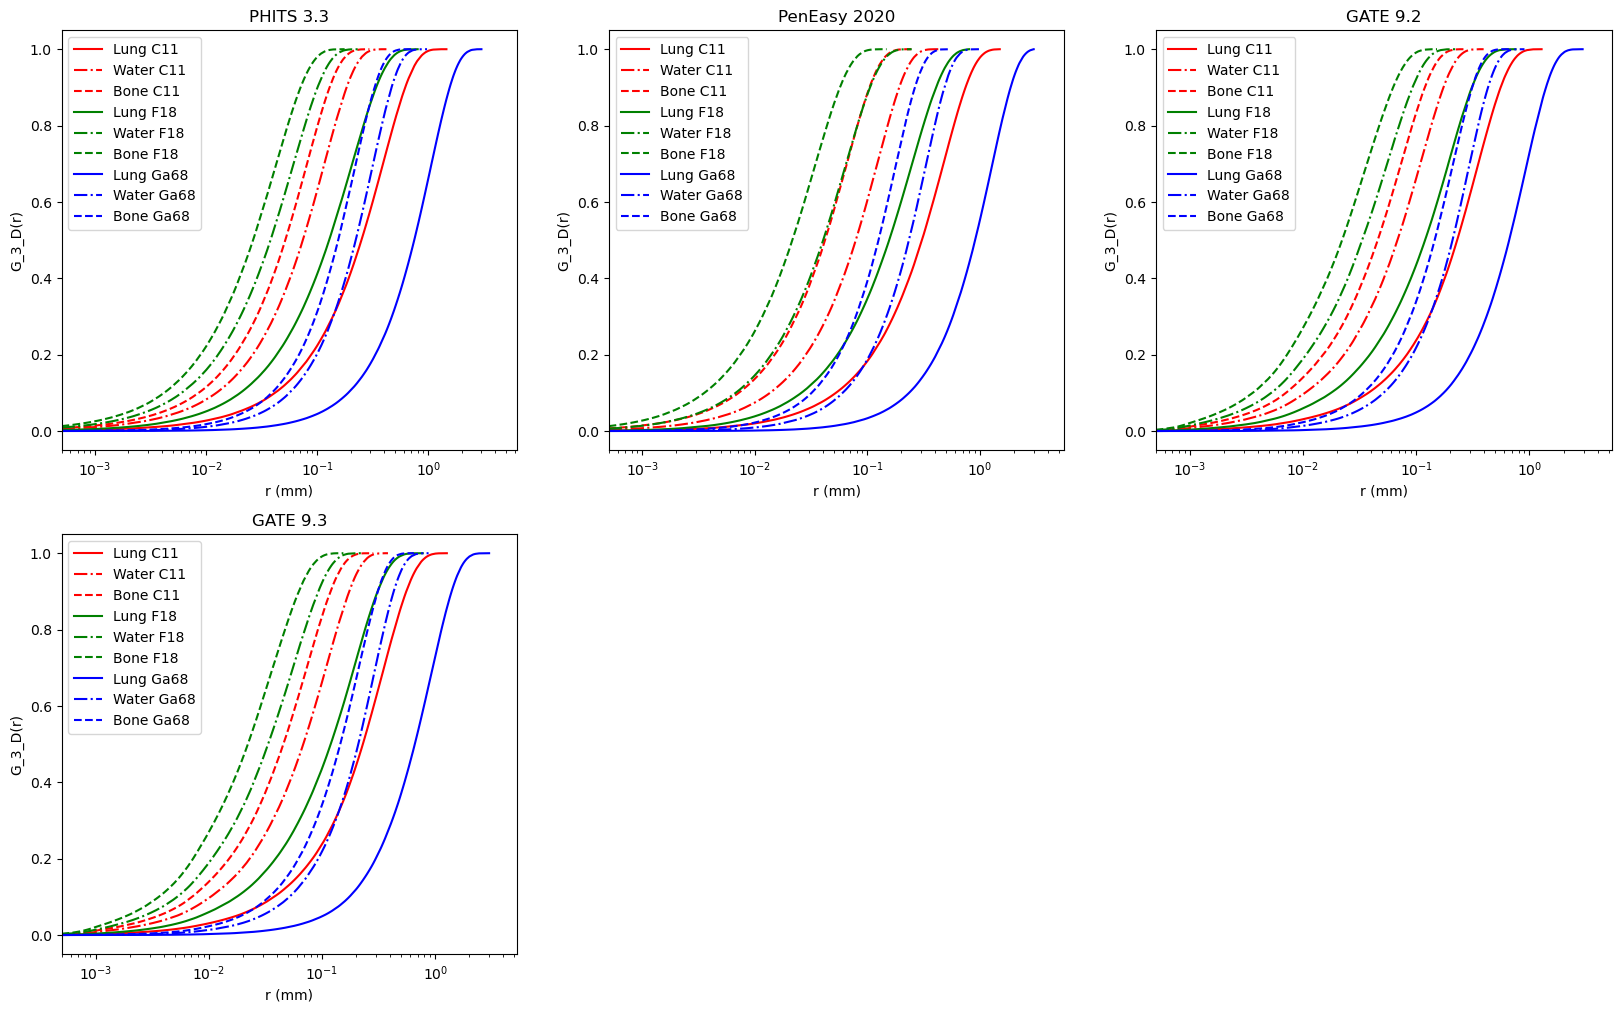

In [49]:
from itertools import cycle
style_mat = cycle(["-","-.","--"])
color_iso = cycle(["r","g","b"])
 
kmax = len(labels_prg[mat])
max_cols = 3
max_rows = int(np.ceil(kmax/max_cols))

plt.figure(figsize=(20, 12))
for k, p in enumerate(pfolders.keys()):
    plt.subplot(max_rows, max_cols, k+1)
    plt.title(f"{p}")
    plt.xlabel("r (mm)")
    plt.ylabel("G_3_D(r)")
    for iso in isotopes:
        c = next(color_iso)
        for mat in mats:
            l = f"{p} {iso} {mat}"
            res = results.active_results[l]
            x = res.rsort
            x = x
            y = res.G3D_nohist
            plt.plot(x, y, c+next(style_mat), label=f"{mat} {iso}")
    plt.xscale('log')
    plt.xlim(5e-4, None)
    plt.legend()


plt.show()

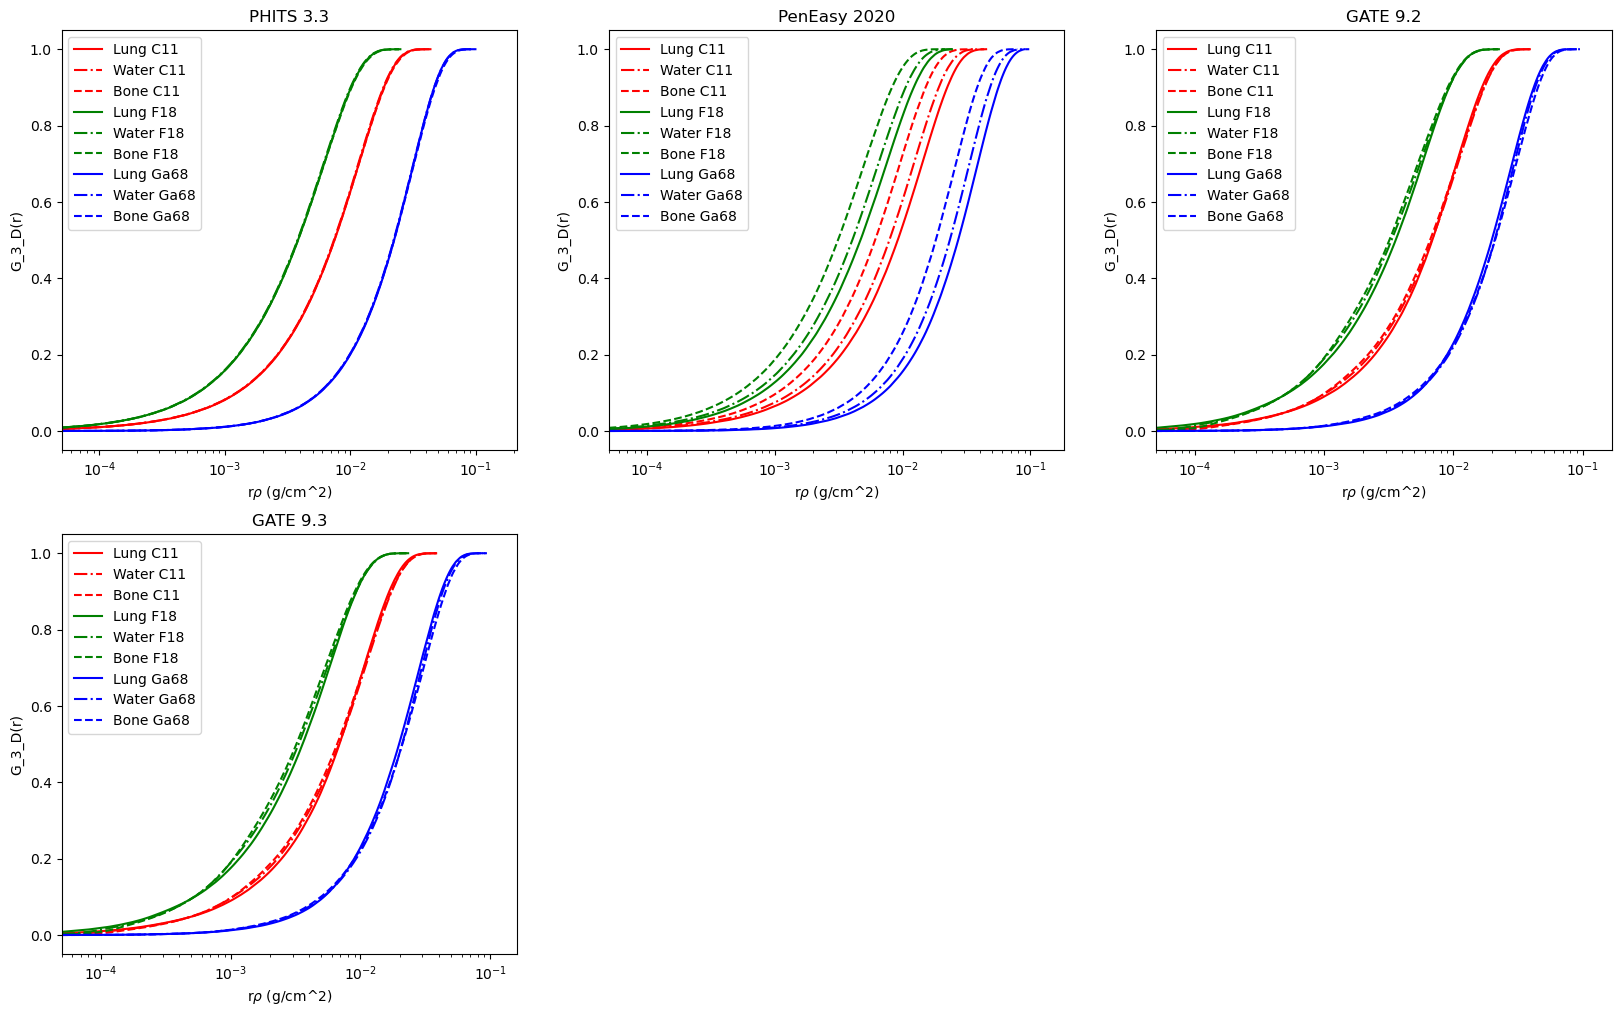

In [ ]:
from itertools import cycle
style_mat = cycle(["-","-.","--"])
color_iso = cycle(["r","g","b"])

dens = { # g/cm3
    "Lung":0.3000,#*7.143064,
    "Water":1.000,#*5.44053,
    "Bone":1.45,#*8.732794,
        }
 
kmax = len(labels_prg[mat])
max_cols = 3
max_rows = int(np.ceil(kmax/max_cols))

plt.figure(figsize=(20, 12))
for k, p in enumerate(pfolders.keys()):
    plt.subplot(max_rows, max_cols, k+1)
    plt.title(f"{p}")
    plt.xlabel(r"r$\rho$ (g/cm^2)")
    plt.ylabel("G_3_D(r)")
    for iso in isotopes:
        c = next(color_iso)
        for mat in mats:
            l = f"{p} {iso} {mat}"
            res = results.active_results[l]
            x = res.rsort
            x = x/10*dens[mat]
            y = res.G3D_nohist
            plt.plot(x, y, c+next(style_mat), label=f"{mat} {iso}")
    plt.xscale('log')
    plt.xlim(5e-5, None)
    plt.legend()


plt.show()